IMPORT DATA

In [1]:
!pip install kaggle

In [2]:
import os
import shutil
import stat

# Create the .kaggle directory
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))

# Set the permissions of the kaggle.json file
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), stat.S_IRUSR | stat.S_IWUSR)


In [3]:
!kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           23MB  2024-06-18 13:27:55            220        389  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           8781        160  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                    Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51            869         25  1.0              
akashnath29/lung-cancer-dataset                   

In [4]:
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<11:27, 1.24MB/s]
  0%|          | 2.00M/812M [00:01<06:05, 2.32MB/s]
  0%|          | 3.00M/812M [00:01<04:29, 3.15MB/s]
  0%|          | 4.00M/812M [00:01<03:20, 4.23MB/s]
  1%|          | 6.00M/812M [00:01<02:14, 6.28MB/s]
  1%|          | 7.00M/812M [00:01<02:02, 6.87MB/s]
  1%|          | 8.00M/812M [00:01<01:51, 7.54MB/s]
  1%|1         | 10.0M/812M [00:01<01:35, 8.79MB/s]
  1%|1         | 11.0M/812M [00:02<01:35, 8.75MB/s]
  1%|1         | 12.0M/812M [00:02<02:01, 6.90MB/s]
  2%|1         | 14.0M/812M [00:02<01:40, 8.34MB/s]
  2%|1         | 16.0M/812M [00:02<01:29, 9.30MB/s]
  2%|2         | 18.0M/812M [00:02<01:24, 9.88MB/s]
  2%|2         | 20.0M/812M [00:03<01:22, 10.1MB/s]
  3%|2         | 21.0M/812M [00:03<01:21, 10.2MB/s]
  3%|2         | 23.0M/812M [00:03<01:21, 10.2MB/s]
  3%|3         | 25.0M/812M [00:03<01:17, 10.6MB/s]
  3%|3         | 27.0M/812M [00:03<01:17, 10.6MB/s]
  4%|3         | 29.

In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
file_names = os.listdir('train/')

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2 

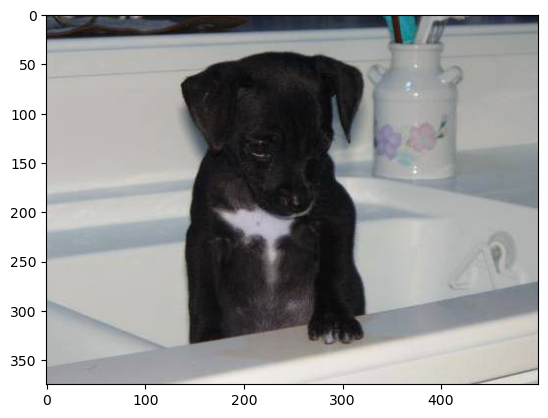

In [10]:
img = cv2.imread('train/dog.8298.jpg')
plt.imshow(img)
plt.show()

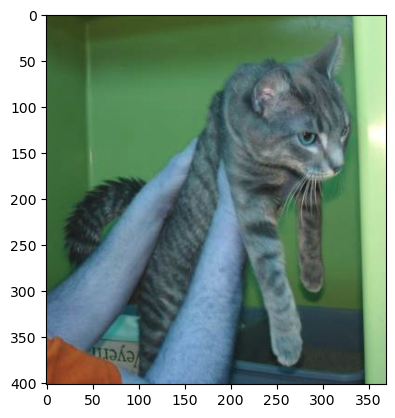

In [11]:
img = cv2.imread('train/cat.1683.jpg')
plt.imshow(img)
plt.show()

PREPROCESSING

In [12]:
file_names = os.listdir('train')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
cat
cat
cat


In [13]:
file_names = os.listdir('train')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [14]:
os.mkdir('image resized')

In [15]:
original_folder = 'train/'
resized_folder = 'image resized/'

for i in range(25000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [16]:
file_names = os.listdir('image resized/')

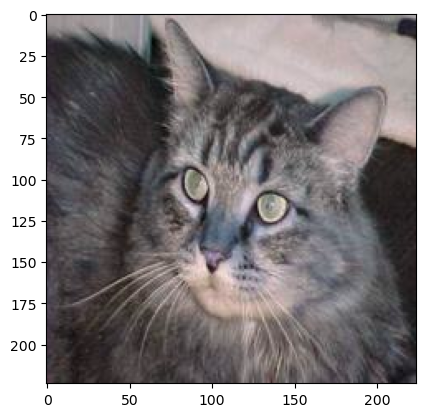

In [17]:
img = cv2.imread('image resized/cat.1109.jpg')
plt.imshow(img)
plt.show()

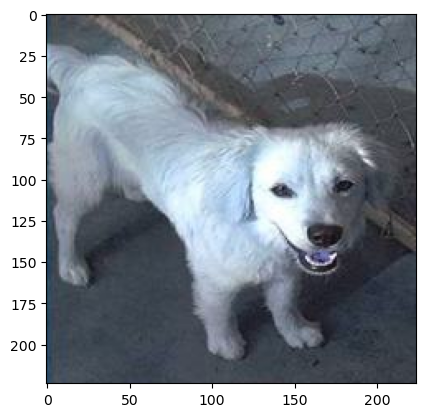

In [18]:
img = cv2.imread('image resized/dog.10682.jpg')
plt.imshow(img)
plt.show()

In [19]:
filenames = os.listdir('image resized')
labels = []

for i in range(25000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [20]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
25000


In [21]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
25000


In [22]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[12500 12500]


In [23]:
import cv2
import glob

In [24]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [25]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [26]:
type(dog_cat_images)

numpy.ndarray

In [27]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [28]:
X = dog_cat_images
Y = np.asarray(labels)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


MODEL BUILDING

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_hub as hub

num_of_classes = 2

# Load the pre-trained model from TensorFlow Hub
pretrained_model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4"
pretrained_model = hub.KerasLayer(pretrained_model_url, trainable=False)

# Define your Sequential model
model = tf.keras.Sequential([
    layers.Rescaling(1./255),  # Rescale pixel values
    tf.keras.layers.Lambda(lambda x: pretrained_model(x)),  # Wrap KerasLayer in Lambda
    layers.Dense(num_of_classes)  # Add your Dense output layer
])
model.build(input_shape=(50, 224, 224, 3))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (50, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (50, 1001)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (50, 2)                     │           2,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,004 (7.83 KB)

 Trainable params: 2,004 (7.83 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [36]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 277ms/step - acc: 0.9565 - loss: 0.1119
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 273ms/step - acc: 0.9809 - loss: 0.0549
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 270ms/step - acc: 0.9828 - loss: 0.0508
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - acc: 0.9842 - loss: 0.0467
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 271ms/step - acc: 0.9834 - loss: 0.0510


VALIDATING ON TEST DATA SET

In [37]:
score, acc = model.evaluate(X_test, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - acc: 0.9772 - loss: 0.0763
Test Loss = 0.06864728033542633
Test Accuracy = 0.9775999784469604


TEST DATA

In [44]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'test1.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [45]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('test1'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  12500


In [46]:
file_names = os.listdir('test1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
The image represents a DOG


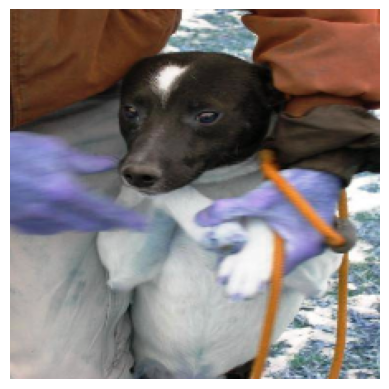

In [47]:
import cv2
import numpy as np

img = cv2.imread('test1/1.jpg')

img1 = cv2.resize(img, (224, 224))
plt.axis("off")
plt.imshow(img1)

img3 = np.reshape(img1, [1, 224, 224, 3])

input_prediction = model.predict(img3)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a CAT')
else:
    print('The image represents a DOG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
The image represents a DOG


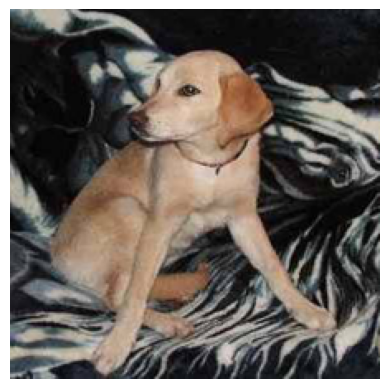

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('test1/199.jpg')

img1 = img.resize((224, 224))

plt.axis("off")
plt.imshow(img1)

img3 = np.reshape(img1, [1, 224, 224, 3])

input_prediction = model.predict(img3)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a CAT')
else:
    print('The image represents a DOG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
The image represents a DOG


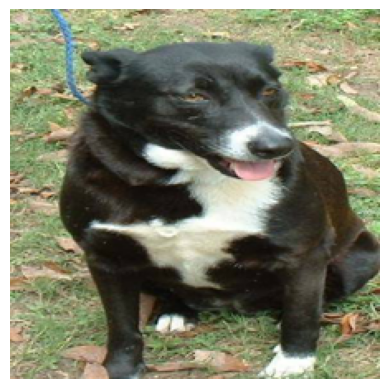

In [49]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('test1/1000.jpg')

img1 = img.resize((224, 224))

plt.axis("off")
plt.imshow(img1)

img3 = np.reshape(img1, [1, 224, 224, 3])

input_prediction = model.predict(img3)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a CAT')
else:
    print('The image represents a DOG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
The image represents a DOG


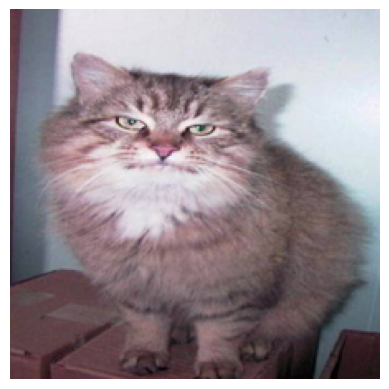

In [50]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('test1/2200.jpg')

img1 = img.resize((224, 224))

plt.axis("off")
plt.imshow(img1)

img3 = np.reshape(img1, [1, 224, 224, 3])

input_prediction = model.predict(img3)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a CAT')
else:
    print('The image represents a DOG')

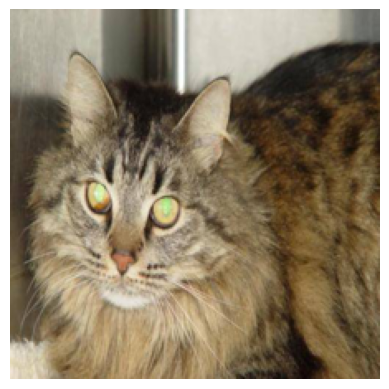

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
The image represents a DOG


In [51]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('test1/2100.jpg')

img1 = img.resize((224, 224))

plt.axis("off")
plt.imshow(img1)
plt.show()

img3 = np.reshape(img1, [1, 224, 224, 3])

input_prediction = model.predict(img3)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print('The image represents a CAT')
else:
    print('The image represents a DOG')